# Problem 1

In [147]:
!pip install -q transformers

In [148]:
from transformers import GPT2LMHeadModel, GPT2TokenizerFast
import torch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [149]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [150]:
test = pd.read_csv('/content/drive/MyDrive/CS6983_GenAI_Folder/Homework_1/Problem1_dataset.csv')

In [151]:
print('First 5 test samples:')

for i, example in enumerate(test.text.values[:5]):
  print(f'{i+1}. {example}')

First 5 test samples:
1.  = Robert Boulter = 

2.  Robert Boulter is an English film , television and theatre actor . He had a guest @-@ starring role on the television series The Bill in 2000 . This was followed by a starring role in the play Herons written by Simon Stephens , which was performed in 2001 at the Royal Court Theatre . He had a guest role in the television series Judge John Deed in 2002 . In 2004 Boulter landed a role as " Craig " in the episode " Teddy 's Story " of the television series The Long Firm ; he starred alongside actors Mark Strong and Derek Jacobi . He was cast in the 2005 theatre productions of the Philip Ridley play Mercury Fur , which was performed at the Drum Theatre in Plymouth and the Menier Chocolate Factory in London . He was directed by John Tiffany and starred alongside Ben Whishaw , Shane Zaza , Harry Kent , Fraser Ayres , Sophie Stanton and Dominic Hall . 

3.  In 2006 , Boulter starred alongside Whishaw in the play Citizenship written by Mark Ra

In [152]:
#Wiki text samples converted to a list of strings:

wiki_list_of_strings = []
for i, example in enumerate(test.text.values):
  #print(f'{i+1}. {example}')
  wiki_list_of_strings.append(example)

cleaned_wiki_list_of_strings = [string.replace('\n', '') for string in wiki_list_of_strings] #List[str]
#print(len(cleaned_wiki_list_of_strings))


[' = Robert Boulter = ',
 ' Robert Boulter is an English film , television and theatre actor '
 '. He had a guest @-@ starring role on the television series The '
 'Bill in 2000 . This was followed by a starring role in the play '
 'Herons written by Simon Stephens , which was performed in 2001 at '
 'the Royal Court Theatre . He had a guest role in the television '
 'series Judge John Deed in 2002 . In 2004 Boulter landed a role as '
 '" Craig " in the episode " Teddy \'s Story " of the television '
 'series The Long Firm ; he starred alongside actors Mark Strong and '
 'Derek Jacobi . He was cast in the 2005 theatre productions of the '
 'Philip Ridley play Mercury Fur , which was performed at the Drum '
 'Theatre in Plymouth and the Menier Chocolate Factory in London . '
 'He was directed by John Tiffany and starred alongside Ben Whishaw '
 ', Shane Zaza , Harry Kent , Fraser Ayres , Sophie Stanton and '
 'Dominic Hall . ',
 ' In 2006 , Boulter starred alongside Whishaw in the play 

In [153]:
# Print dataset statistics:

# The TOTAL number of samples in dataset:
count = len(test.text.values)
print(f'Total number of samples: {count}')

# The AVERAGE number of characters per sample:
num_char, count = 0, 0
for example in (test.text.values):
    num_char += len(example)
    count += 1
print(f'The average number of characters per sample {(num_char/count)}')


Total number of samples: 187
The average number of characters per sample 483.80213903743316


In [154]:
# Complete function to Calculate Perplexity

def calculate_perplexity(text, model, tokenizer, window_length=1024, step_size=256):
  model_inputs = tokenizer.encode(text, return_tensors='pt')
  perplexities = []
  DIMENSION = 1
  for start in range(0, model_inputs.size(DIMENSION), step_size):
        end = min(start + window_length, model_inputs.size(DIMENSION))
        window = model_inputs[:, start:end]

        with torch.no_grad():
            outputs = model(window, labels=window)

        neg_log_likelihood = outputs.loss

        perplexity = torch.exp(neg_log_likelihood)
        perplexities.append(perplexity.item())

        average_perplexity = sum(perplexities) / len(perplexities) if perplexities else float('inf')
  return average_perplexity


In [ ]:
# Complete code for HuggingFace GPT2 model (small, medium, and large) evaluation, according to the perplexity metric

# HuggingFace GPT2 model - Small
# small_tokenizer = GPT2TokenizerFast.from_pretrained('gpt2')
# small_model = GPT2LMHeadModel.from_pretrained('gpt2')

# perplexity_dicitonary_gpt2 = dict()
# for i in range(len(cleaned_wiki_list_of_strings)):
#   perplexity_dicitonary_gpt2[i]=calculate_perplexity(cleaned_wiki_list_of_strings[i],small_model,small_tokenizer)
# print(perplexity_dicitonary_gpt2)


# # HuggingFace GPT2 model - Medium

# medium_tokenizer = GPT2TokenizerFast.from_pretrained('gpt2-medium')
# medium_model = GPT2LMHeadModel.from_pretrained('gpt2-medium')
# perplexity_dicitonary_gpt2_medium = dict()
# # for i in range(len(cleaned_wiki_list_of_strings)):
# #   perplexity_dicitonary_gpt2_medium[i]=calculate_perplexity(cleaned_wiki_list_of_strings[i],medium_model,medium_tokenizer)
# print(perplexity_dicitonary_gpt2_medium)


# HuggingFace GPT2 model - Large
large_tokenizer = GPT2TokenizerFast.from_pretrained('gpt2-large')
large_model = GPT2LMHeadModel.from_pretrained('gpt2-large')

perplexity_dicitonary_gpt2_large = dict()
for i in range(len(cleaned_wiki_list_of_strings)):
  perplexity_dicitonary_gpt2_large[i]=calculate_perplexity(cleaned_wiki_list_of_strings[i],large_model,large_tokenizer)
print(perplexity_dicitonary_gpt2_large)




In [201]:
items = list(perplexity_dicitonary_gpt2_large.items())
items.sort(key=lambda x: x[1])

items.sort(key=lambda x: x[1], reverse=True)




#Lowest perplexity samples
pprint.pp(cleaned_wiki_list_of_strings[127], depth=1, width=90)
pprint.pp(cleaned_wiki_list_of_strings[83], depth=1, width=90)
pprint.pp(cleaned_wiki_list_of_strings[84], depth=1, width=90)

#Highest perplexity samples
pprint.pp(cleaned_wiki_list_of_strings[93], depth=1, width=90)
pprint.pp(cleaned_wiki_list_of_strings[183], depth=1, width=90)
pprint.pp(cleaned_wiki_list_of_strings[14], depth=1, width=90)


Sorted in ascending order: [(2, 27.221298217773438), (1, 29.44189453125), (5, 30.019569396972656), (4, 88.4051513671875), (3, 360.9991149902344), (0, 1270.773193359375)]
Sorted in descending order: [(0, 1270.773193359375), (3, 360.9991149902344), (4, 88.4051513671875), (5, 30.019569396972656), (1, 29.44189453125), (2, 27.221298217773438)]
(" The ships ' secondary armament consisted of twenty 50 @-@ calibre 14 @-@ centimetre "
 'Type 3 . Eighteen of these were mounted in casemates in the forecastle and '
 'superstructure and the remaining pair were mounted on the deck above them and '
 'protected by gun shields . They had a maximum elevation of + 20 degrees which gave '
 'them ranges of 16 @,@ 300 metres ( 17 @,@ 800 yd ) . Each gun had a rate of fire of up '
 'to 10 rounds per minute . Anti @-@ aircraft defence was provided by four 40 @-@ '
 'calibre 3rd Year Type 8 @-@ centimetre AA guns in single mounts . The 7 @.@ 62 @-@ '
 'centimetre ( 3 in ) high @-@ angle guns had a maximum elev

In [ ]:
# Print results:

#GPT-2 Model Results
gpt2_values = list(perplexity_dicitonary_gpt2.values())

#25TH AND 75TH PERCENTILES
percentile_25 = np.percentile(gpt2_values, 25)
print("25th percentiles of the perplexity: ", percentile_25)
percentile_75 = np.percentile(gpt2_values, 75)
print("75th percentiles of the perplexity: ", percentile_75)

gpt2_values.sort()
mid = len(gpt2_values) // 2
res = (gpt2_values[mid] + gpt2_values[~mid]) / 2
print("median perplexity: " + str(res))

midhinge = (percentile_25 + percentile_75) / 2
print("midhinge perplexity:",midhinge)


In [ ]:
# Comments:
# The larger the HuggingFace GPT2 model size, the smaller the perplexity.
# The larger the HuggingFace GPT2 model size, the higher the upperbound of the sentence perplexity perplexity calculated for the entire text

In [ ]:
# #Create GPT2-Histogram
gpt2_values = list(perplexity_dicitonary_gpt2.values())
plt.hist(gpt2_values, edgecolor="red", bins=30)

# Adding labels and title
plt.xlabel('Perplexity GPT-2 Small Values')
plt.ylabel('Frequency')
plt.title('GPT-2 Histogram (Small)')

plt.show()


In [ ]:
#Create a GPT2-Medium Model Histogram
gpt2_medium_values = list(perplexity_dicitonary_gpt2_medium.values())
plt.hist(gpt2_medium_values, edgecolor="red", bins=30)

# Adding labels and title
plt.xlabel('Perplexity GPT-2 Medium Values')
plt.ylabel('Frequency')
plt.title('GPT-2 Histogram (Medium)')

plt.show()

In [ ]:
#Create a GPT2-Large Model Histogram
gpt2_large_values = list(perplexity_dicitonary_gpt2_large.values())
plt.hist(gpt2_large_values, edgecolor="red", bins=30)

# Adding labels and title
plt.xlabel('Perplexity GPT-2 Large Values')
plt.ylabel('Frequency')
plt.title('GPT-2 Histogram (Large)')

plt.show()

In [ ]:
#GPT-2 Medium Model Results
gpt2_medium_values = list(perplexity_dicitonary_gpt2_medium.values())

#25TH AND 75TH PERCENTILES

#Percentile Calculation for gpt2
percentile_25 = np.percentile(gpt2_medium_values, 25)
print("25th percentiles of the perplexity: ", percentile_25)
percentile_75 = np.percentile(gpt2_large_values, 75)
print("75th percentiles of the perplexity: ", percentile_75)

gpt2_medium_values.sort()
mid = len(gpt2_medium_values) // 2
res = (gpt2_medium_values[mid] + gpt2_medium_values[~mid]) / 2
print("median perplexity: " + str(res))

midhinge = (percentile_25 + percentile_75) / 2
print("midhinge perplexity:",midhinge)

In [ ]:
#GPT-2 Large Model Results

#25TH AND 75TH PERCENTILES
gpt2_large_values = list(perplexity_dicitonary_gpt2_large.values())
#Percentile Calculation for gpt2
percentile_25 = np.percentile(gpt2_large_values, 25)
print("25th percentiles of the perplexity: ", percentile_25)
percentile_75 = np.percentile(gpt2_large_values, 75)
print("75th percentiles of the perplexity: ", percentile_75)

gpt2_large_values.sort()
mid = len(gpt2_large_values) // 2
res = (gpt2_large_values[mid] + gpt2_large_values[~mid]) / 2
print("median perplexity: " + str(res))

midhinge = (percentile_25 + percentile_75) / 2
print("midhinge perplexity:",midhinge)

# Problem 2

In [156]:
!pip install mauve-text

In [157]:
#Imports
from transformers import GPT2Tokenizer, GPT2LMHeadModel

from tqdm import tqdm
import torch
import mauve
import json
import os
import sys
import requests
import pickle

seed = 123
torch.manual_seed(seed)
np.random.seed(seed)

In [158]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [159]:
# Load test set
path = '/content/drive/MyDrive/CS6983_GenAI_Folder/Homework_1/Problem2_dataset.pkl'

with open(path, 'rb') as file:
    data = pickle.load(file)
print(data)

samples = ""
for i in range(len(data)):
  text_data = data[i]['text']
  samples += text_data
#print(samples)
#print(type(samples))
#print(len(samples))

print(len(samples.split("\n\n")))
text_input = samples.split("\n\n")
print(len(text_input))

[{'id': 255000, 'ended': True, 'length': 134, 'text': 'Is this restaurant family-friendly ? Yes No Unsure\n\nDoes this restaurant accept reservations ? Yes No Unsure\n\nAre the prices at this restaurant mid-range / moderate? Yes No Unsure\n\nIs this restaurant good for dinner? Yes No Unsure\n\nIs this restaurant good for lunch? Yes No Unsure\n\nIs this a Japanese restaurant? Yes No Unsure\n\nCould this location be considered a specialty food market? Yes No Unsure\n\nDoes this restaurant have waiters and waitresses ? Yes No Unsure\n\nIs this restaurant a hidden gem or off-the-beaten path? Yes No Unsure\n\nIs this primarily a bakery ? Yes No Unsure'}, {'id': 255001, 'ended': True, 'length': 713, 'text': 'Clinton talks about her time of \'reflection\' during sick days\n\nHillary Clinton returned to the campaign trail Thursday afternoon, debuting some new intro music and telling the crowd that her sick days allowed her a chance to "reconnect with what this whole campaign is about."\n\nThe 

In [160]:
device = torch.device("cuda")
large_tokenizer = GPT2TokenizerFast.from_pretrained('gpt2-large')
large_model = GPT2LMHeadModel.from_pretrained('gpt2-large')

In [ ]:
large_tokenizer.eos_token_id

50256

In [ ]:
#The Greedy Algorithm for Sentence Generation
torch_device = "cuda"
MAX_LEN = 50
TOKEN_ID = large_tokenizer.eos_token_id
greedy_output_sentences = []
for i in range(len(text_input)):
  prefix=text_input[i].split()[:10]
  generation_input = ' '.join(prefix)
  #print(generation_input)
  input_ids = large_tokenizer.encode(generation_input,return_tensors="pt")
  attention_mask = torch.ones(input_ids.shape)
  greedy_output=large_model.generate(input_ids, max_length=MAX_LEN,attention_mask=attention_mask,pad_token_id=TOKEN_ID).to(torch_device)
  greedy_output_sentences.append(large_tokenizer.decode(greedy_output[0], remove_special_tokens = True))


#Top-k:
for i in range(len(text_input)):
  prefix=text_input[i].split()[:10]
  generation_input = ' '.join(prefix)
  input_ids = large_tokenizer.encode(generation_input, return_tensors='pt')
  output_generated = large_model.generate(input_ids, do_sample = True, max_length = MAX_LEN, top_k = 10,attention_mask=None,pad_token_id=TOKEN_ID)
  print(large_tokenizer.decode(output_generated[0],remove_special_tokens=True))


#Beam Search:
beam_generated = []
for i in range(len(text_input)):
  prefix=text_input[i].split()[:10]
  generation_input = ' '.join(prefix)
  input_ids = large_tokenizer.encode(generation_input, return_tensors='pt')
  beam_outputs = large_model.generate(input_ids, max_length=MAX_LEN, num_beams = 5,attention_mask=None,pad_token_id=TOKEN_ID)
    beam_generated.append(beam_output)
    print(large_tokenizer.decode(beam_output, remove_special_tokens=True))





In [ ]:
# print(greedy_output_sentences)

['Is this restaurant family-friendly? Yes No Unsure\n\nCan a gluten free person get a good meal at this restaurant? Yes No Unsure\n\nCan a vegan person get a good meal at this restaurant? Yes No Unsure\n\nAre the prices', 'Sacred Cows<|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>The story of the story: How the German navy developed a fleet of submarines that were the first to be remotely deployed to the waters off Somalia earlier this year\n\nGerman submarine chief Gerd-Ad', 'In an effort to help women get home safely, we\'ve developed some suggestions. A common question we have from women who find themselves in emergency situations is: "What do I do if the fire alarm goes off?" Often no clear answer is found in', 'About 7 p.m. Saturday, a motorist tried to stop a white van in the 23000 block of North Naito Parkway, according to a statement from the St. Louis Metropolitan Police Department. When that vehicle then attempted to run a green', 'Petit fires b

In [ ]:
!pip install evaluate

In [170]:
# Compute the MAUVE score

#list of original text sentences
original_data = []
for i in range(len(text_input)):
  original_data.append(text_input[i])
print(len(original_data))

# print(len(greedy_output_sentences))
# print()

2414


In [183]:
#Print results:
print(len(original_data))
print(len(text_input))
# print(type(text_input))
# print(text_input[0])
# print(text_input[60])
# print(text_input[2413])

#Greedy Algorithm Mauve score
def tensor_version_of_sentences(list_str):
    inputs = tokenizer(list_str, return_tensors='pt', padding=True, truncation=True, max_length=50)
    return inputs['input_ids']

generated_tensors = tensor_version_sentences(text_generation_output)
original_tensors = tensor_version_sentences(original)
mauve_results = mauve.compute_mauve(generated_tensors, original_tensors)
print("the mauve score", mauve_results.mauve)

2414
2414
the mauve score 0.0040720962619612555


In [ ]:
# Select the sentence of the highest and lowest MAUVE score
#for each generation strategy and print it. Discuss your observations.

# The sentence with the highest mauve score was:
#The ships ' secondary armament consisted of twenty 50 @-@ calibre 14 @-@ centimetre "
 #'Type 3 . Eighteen of these were mounted in casemates in the forecastle and '
#  'superstructure and the remaining pair were mounted on the deck above them and '
#  'protected by gun shields . They had a maximum elevation of + 20 degrees which gave '
#  'them ranges of 16 @,@ 300 metres ( 17 @,@ 800 yd ) . Each gun had a rate of fire of up '
#  'to 10 rounds per minute . Anti @-@ aircraft defence was provided by four 40 @-@ '
#  'calibre 3rd Year Type 8 @-@ centimetre AA guns in single mounts . The 7 @.@ 62 @-@ '
#  'centimetre ( 3 in ) high @-@ angle guns had a maximum elevation of + 75 degrees , and '
#  'had a rate of fire of 13 to 20 rounds per minute . They fired a 6 kg ( 13 lb ) '
#  'projectile with a muzzle velocity of 680 m / s ( 2 @,@ 200 ft / s ) to a maximum '
#  'height of 7 @,@ 500 metres ( 24 @,@ 600 ft ) .

# The sentnce with the lowest mauve score was:
# CD single


# Problem 3

In [ ]:
!pip install datasets scikit-learn

In [ ]:
!pip install pyarrow==15.0.2

In [ ]:
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, AdamW
from transformers import get_scheduler
from transformers import TrainingArguments, Trainer
from datasets import load_dataset
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from torch.utils.data import DataLoader
from tqdm.auto import tqdm
from sklearn.metrics import roc_curve, auc


In [ ]:
# Load IMDb dataset and limit to 1000 samples
dataset = load_dataset('imdb')
train_dataset = dataset['train'].shuffle(seed=42).select(range(1000))
test_dataset = dataset['test'].shuffle(seed=42).select(range(100)) #Select 100 Samples

In [ ]:
print('5 Training examples')
for i, example in enumerate(train_dataset['text'][:5]):
  print(f'{i+1}. {example}')


5 Training examples
1. There is no relation at all between Fortier and Profiler but the fact that both are police series about violent crimes. Profiler looks crispy, Fortier looks classic. Profiler plots are quite simple. Fortier's plot are far more complicated... Fortier looks more like Prime Suspect, if we have to spot similarities... The main character is weak and weirdo, but have "clairvoyance". People like to compare, to judge, to evaluate. How about just enjoying? Funny thing too, people writing Fortier looks American but, on the other hand, arguing they prefer American series (!!!). Maybe it's the language, or the spirit, but I think this series is more English than American. By the way, the actors are really good and funny. The acting is not superficial at all...
2. This movie is a great. The plot is very true to the book which is a classic written by Mark Twain. The movie starts of with a scene where Hank sings a song with a bunch of kids called "when you stub your toe on the 

In [ ]:
print('5 Testing examples')
for i, example in enumerate(test_dataset['text'][:5]):
  print(f'{i+1}. {example}')


5 Testing examples
1. <br /><br />When I unsuspectedly rented A Thousand Acres, I thought I was in for an entertaining King Lear story and of course Michelle Pfeiffer was in it, so what could go wrong?<br /><br />Very quickly, however, I realized that this story was about A Thousand Other Things besides just Acres. I started crying and couldn't stop until long after the movie ended. Thank you Jane, Laura and Jocelyn, for bringing us such a wonderfully subtle and compassionate movie! Thank you cast, for being involved and portraying the characters with such depth and gentleness!<br /><br />I recognized the Angry sister; the Runaway sister and the sister in Denial. I recognized the Abusive Husband and why he was there and then the Father, oh oh the Father... all superbly played. I also recognized myself and this movie was an eye-opener, a relief, a chance to face my OWN truth and finally doing something about it. I truly hope A Thousand Acres has had the same effect on some others out th

In [ ]:
# Complete code for Fine-tuning BERT for sentiment classification
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

DistilBertmodel = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)

# Freeze all layers
for layer in DistilBertmodel.parameters():
    layer.requires_grad = False

# Do not freeze last classification layer
for layer in DistilBertmodel.classifier.parameters():
    layer.requires_grad = True


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Token Creation
def tokenize_function(examples):
    return tokenizer(examples['text'], padding='max_length', truncation=True)

# Creating the Dataset
tokenized_train = train_dataset.map(tokenize_function, batched=True)
tokenized_eval = test_dataset.map(tokenize_function, batched=True)

In [ ]:
training_args = TrainingArguments(
    output_dir="my_model_directory",
    learning_rate=1e-5,
    per_device_train_batch_size=64,
    per_device_eval_batch_size=16,
    num_train_epochs=5,
)

# Create a Trainer instance
trainer = Trainer(
    model=DistilBertmodel,
    args=training_args,
    train_dataset= tokenized_train,
    eval_dataset=tokenized_eval,
)

# Start the training process
trainer.train()


Step,Training Loss


TrainOutput(global_step=80, training_loss=0.6880020141601563, metrics={'train_runtime': 98.9664, 'train_samples_per_second': 50.522, 'train_steps_per_second': 0.808, 'total_flos': 662336993280000.0, 'train_loss': 0.6880020141601563, 'epoch': 5.0})

In [ ]:
# Print results:
eval_results = trainer.predict(tokenized_eval)

preds = np.argmax(eval_results.predictions, axis=1)
labels = eval_results.label_ids

# Accuracy
accuracy = accuracy_score(labels, preds)

# Precision, Recall, F1 Score
precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')

# Error rate (1 - Accuracy)
error_rate = 1 - accuracy



In [ ]:
#Printing all metrics
print("Accuracy metric", accuracy)
print("Precision, Recall, F1 Score", precision, recall, f1)
print("Error rate", 1 - accuracy)

Accuracy metric 0.59
Precision, Recall, F1 Score 0.7108152173913044 0.59 0.49977429467084633
Error rate 0.41000000000000003


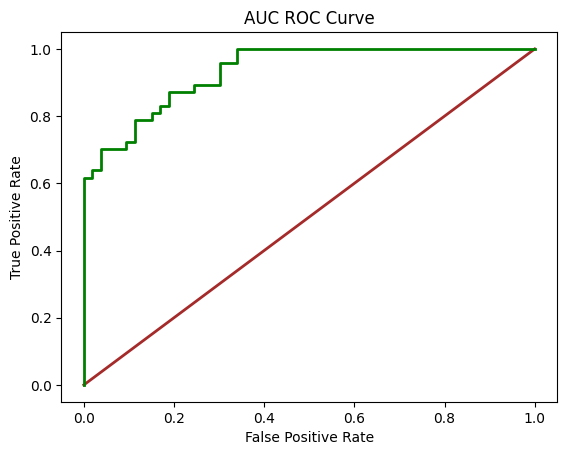

In [202]:
modl_eval_results = trainer.predict(tokenized_eval)
labels = eval_results.label_ids
model_y_scores = modl_eval_results.predictions[:, 1]

fpr, tpr, thresholds = roc_curve(labels, model_y_scores)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure()
plt.plot([0, 1], [0, 1], color='brown', lw=2)
plt.plot(fpr, tpr, color='green', lw=2)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC ROC Curve')
plt.show()


In [ ]:
for layer in DistilBertmodel.parameters():
    layer.requires_grad = True

In [ ]:
training_args = TrainingArguments(
    output_dir="my_model_directory",
    learning_rate=1e-5,
    per_device_train_batch_size=64,
    per_device_eval_batch_size=16,
    num_train_epochs=5,
)

# Create a Trainer instance
trainer = Trainer(
    model=DistilBertmodel,
    args=training_args,
    train_dataset= tokenized_train,
    eval_dataset=tokenized_eval,
)

# Start the training process
trainer.train()

Step,Training Loss
10,0.676600
20,0.609200
30,0.488300
40,0.455800
50,0.321100
60,0.368800
70,0.438300
80,0.214400
90,0.232200
100,0.255800


TrainOutput(global_step=315, training_loss=0.18454010839618387, metrics={'train_runtime': 246.1843, 'train_samples_per_second': 20.31, 'train_steps_per_second': 1.28, 'total_flos': 679292820307968.0, 'train_loss': 0.18454010839618387, 'epoch': 5.0})

In [ ]:
eval_results = trainer.evaluate()
print("The cross-entropy loss",eval_results['eval_loss'])

The test cross-entropy loss 0.8423845767974854


In [ ]:
print("Accuracy metric", accuracy)
print("Precision, Recall, F1 Score", precision, recall, f1)
print("Error rate", 1 - accuracy)

Accuracy metric 0.82
Precision, Recall, F1 Score 0.8300202020202019 0.82 0.8197118847539017
Error rate 0.18000000000000005


In [ ]:
#Print results:
eval_results = trainer.predict(tokenized_eval)

preds = np.argmax(eval_results.predictions, axis=1)
labels = eval_results.label_ids

# Accuracy
accuracy = accuracy_score(labels, preds)

# Precision, Recall, F1 Score
precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')

# Error rate (1 - Accuracy)
error_rate = 1 - accuracy

In [ ]:
# Comments:
# It is evident that the models that have been fine tuned on the last layer
# are much more accurate at classification compared to the models that have only
# been fine tuned on the final layer.